In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sys
!{sys.executable} -m pip install pandas-profiling
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE

from sklearn.preprocessing import Normalizer
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
import math


C:\Users\sashi saravan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sashi saravan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\sashi saravan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
'C:\Users\sashi' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
Orginal_data = pd.read_csv("D:/Main Project New/GenderDiabetes.csv" , sep = "," , encoding = 'utf-8')

data = pd.read_csv("D:/Main Project New/GenderDiabetes.csv" , sep = "," , encoding = 'utf-8')

In [3]:
data.shape 

(15768, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15768 entries, 0 to 15767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    15768 non-null  object 
 1   Pregnancies               15768 non-null  int64  
 2   Glucose                   15768 non-null  int64  
 3   BloodPressure             15768 non-null  int64  
 4   SkinThickness             15768 non-null  int64  
 5   Insulin                   15768 non-null  int64  
 6   BMI                       15768 non-null  float64
 7   DiabetesPedigreeFunction  15768 non-null  float64
 8   Age                       15768 non-null  int64  
 9   Outcome                   15768 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.2+ MB


In [5]:
data.isnull().sum()

Gender                      0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Gender,2
Pregnancies,4
Glucose,157
BloodPressure,92
SkinThickness,73
Insulin,679
BMI,381
DiabetesPedigreeFunction,1519
Age,58
Outcome,2


In [7]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

v_counts(data)

Female    11148
Male       4620
Name: Gender, dtype: int64
_____________________________________________________________________________
1    4714
0    4678
3    3197
2    3179
Name: Pregnancies, dtype: int64
_____________________________________________________________________________
97     272
96     248
118    215
95     212
107    210
      ... 
194      3
193      2
195      2
198      1
199      1
Name: Glucose, Length: 157, dtype: int64
_____________________________________________________________________________
78     451
81     445
80     441
86     421
84     417
      ... 
29       6
33       5
112      5
117      3
122      1
Name: BloodPressure, Length: 92, dtype: int64
_____________________________________________________________________________
11    663
9     593
10    577
45    527
34    525
     ... 
93      1
60      1
99      1
63      1
66      1
Name: SkinThickness, Length: 73, dtype: int64
________________________________________________________________________

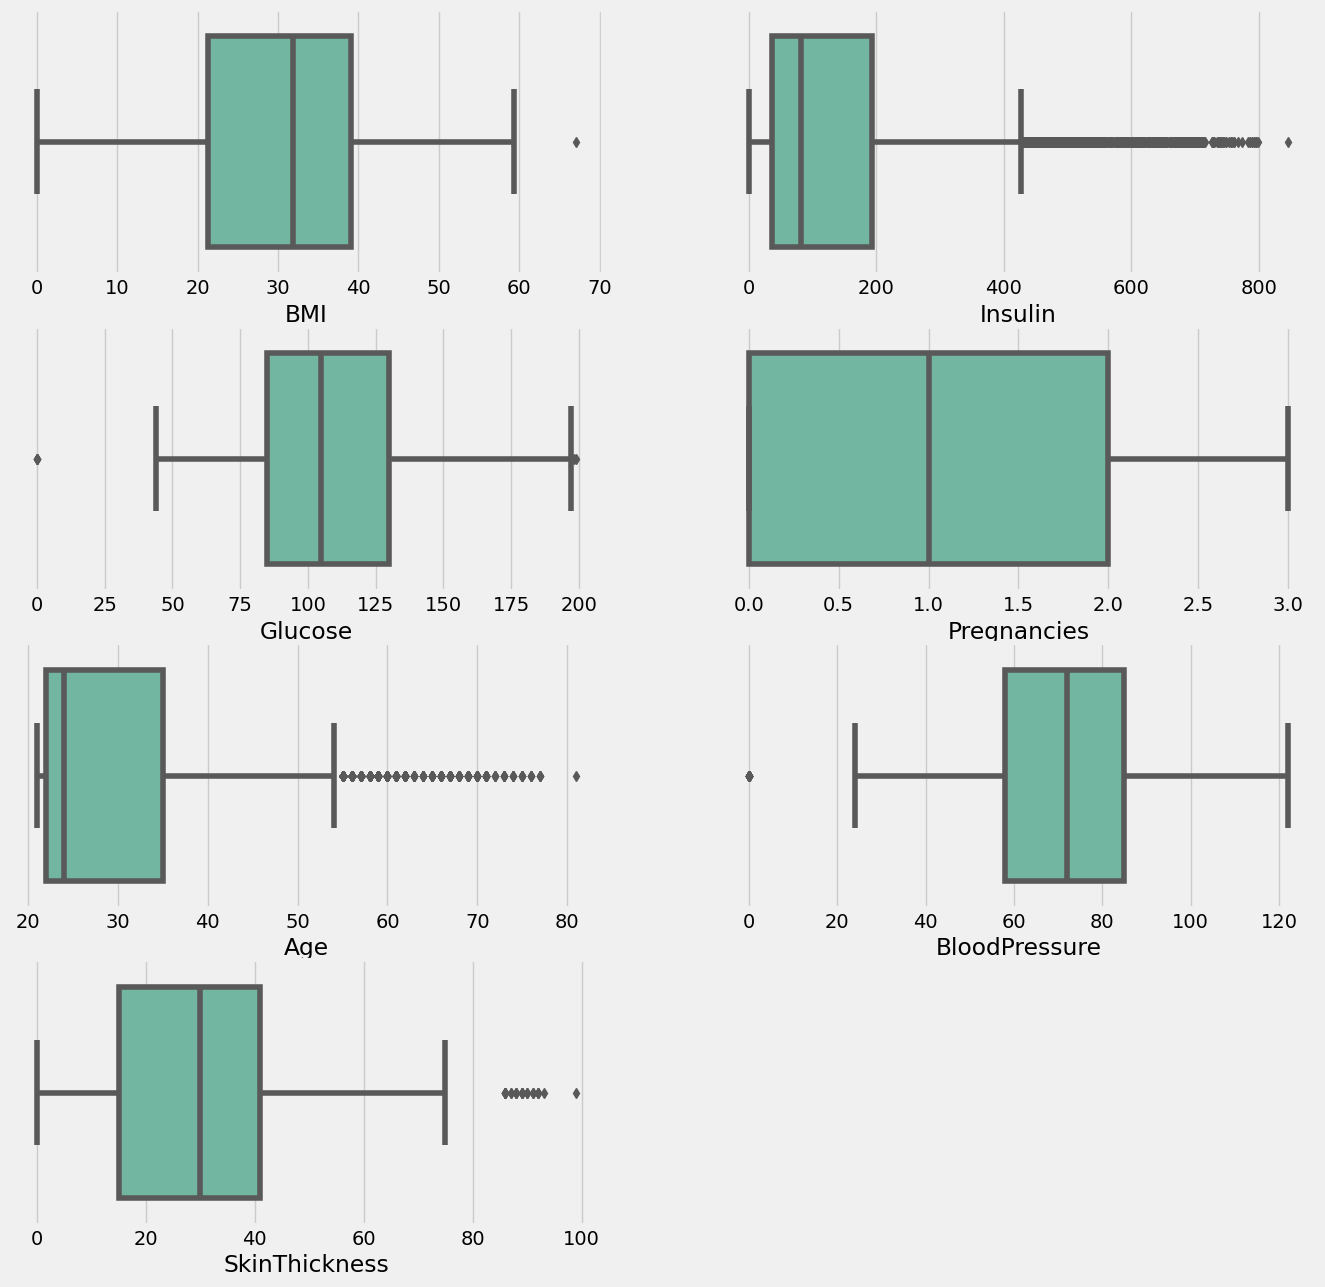

In [8]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'Insulin', 'Glucose', 'Pregnancies', 'Age','BloodPressure', 'SkinThickness']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

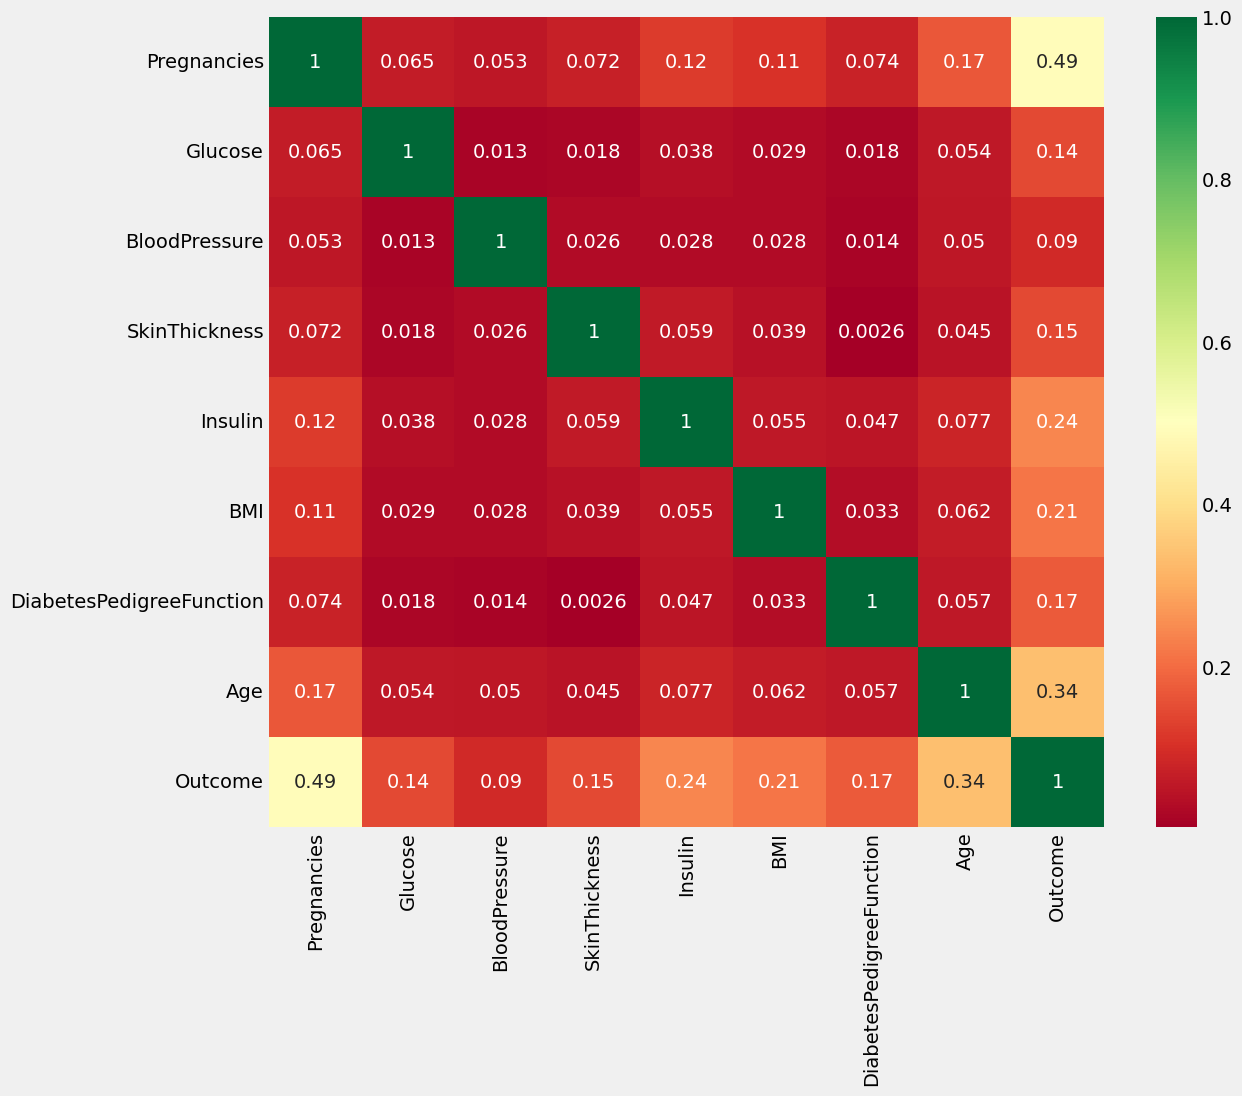

In [9]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

In [10]:
data.duplicated().sum()

0

In [11]:
#average of column Daibetes_binary 
# 0 for non-Diabetic person and 1 for Diabetic person

data["Outcome"].value_counts()

0    10500
1     5268
Name: Outcome, dtype: int64

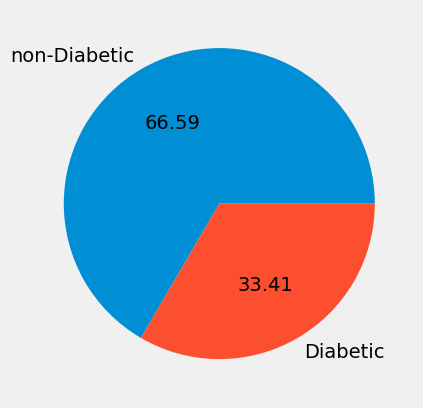

In [12]:
labels=["non-Diabetic","Diabetic"]

plt.pie(data["Outcome"].value_counts() , labels =labels ,autopct='%.02f' );

In [13]:
def data_clean(df=None):
        data["Gender"]=data["Gender"].replace({"Male":0,"Female":1}).astype(int)
        return data
    
    
diabetes_df_clean=data_clean(data)
diabetes_df_clean.head()

,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,0,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,0,0,183,64,0,0,23.3,0.672,32,1
3,1,1,89,66,23,94,28.1,0.167,21,0
4,0,0,137,40,35,168,43.1,2.288,33,1


In [14]:
data.corr()

,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Gender,1.000000,0.765989,0.047201,0.042699,0.065009,0.110881,0.088284,0.069356,0.127415,0.409604
Pregnancies,0.765989,1.000000,0.064573,0.053188,0.071713,0.120842,0.106447,0.073997,0.166735,0.491226
Glucose,0.047201,0.064573,1.000000,0.012889,0.017806,0.037548,0.029373,0.018142,0.054070,0.144720
BloodPressure,0.042699,0.053188,0.012889,1.000000,0.026116,0.028235,0.027600,0.014270,0.050474,0.089558
SkinThickness,0.065009,0.071713,0.017806,0.026116,1.000000,0.059279,0.038989,0.002587,0.045156,0.146355
Insulin,0.110881,0.120842,0.037548,0.028235,0.059279,1.000000,0.055032,0.047316,0.076920,0.240494
BMI,0.088284,0.106447,0.029373,0.027600,0.038989,0.055032,1.000000,0.033218,0.062323,0.213642
DiabetesPedigreeFunction,0.069356,0.073997,0.018142,0.014270,0.002587,0.047316,0.033218,1.000000,0.056874,0.170526
Age,0.127415,0.166735,0.054070,0.050474,0.045156,0.076920,0.062323,0.056874,1.000000,0.337468
Outcome,0.409604,0.491226,0.144720,0.089558,0.146355,0.240494,0.213642,0.170526,0.337468,1.000000


In [15]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),), columns=['Gender','Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.553379,-1.189871,1.230691,0.052212,0.447210,-1.016465,0.213625,0.596851,1.630153
1,0.643758,-0.281877,-0.731780,-0.302830,0.039987,-1.016465,-0.509815,-0.136975,0.058811
2,-1.553379,-1.189871,2.320952,-0.421178,-1.928257,-1.016465,-0.850866,0.716497,0.141514
3,0.643758,-0.281877,-0.607178,-0.302830,-0.367236,-0.308833,-0.354792,-0.626192,-0.768210
4,-1.553379,-1.189871,0.888037,-1.841350,0.447210,0.248239,1.195437,5.013099,0.224216


In [16]:
#X = Orginal_data.iloc[:,1:]
#Y = Orginal_data.iloc[:,0]
X = Orginal_data.iloc[:, :-1].values
y = Orginal_data.iloc[:, 9].values

In [17]:
X=data.drop("Outcome",axis=1)
y=data["Outcome"]

In [18]:
y.value_counts()

0    10500
1     5268
Name: Outcome, dtype: int64

In [19]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,y)

print(y_sm.shape , x_sm.shape)

(10536,) (10536, 9)


In [20]:
y_sm.value_counts()

0    5268
1    5268
Name: Outcome, dtype: int64

In [21]:
X_train , X_test , y_train , y_test = train_test_split(x_sm,y_sm, test_size=0.2 , random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

   Maximum depth  Accuracy  F1 Score  Precision  Recall     AUC  \
0              2    0.7855    0.6171     0.7820  0.5097  0.7184   
1              4    0.8508    0.7801     0.7801  0.7801  0.8336   
2              6    0.8759    0.8187     0.8119  0.8255  0.8637   
3              8    0.8890    0.8394     0.8245  0.8548  0.8807   

   Mean Squared Error  Computational Time  Error Rate  Sensitivity   \
0              0.2145              0.0226      0.2145        0.5097   
1              0.1492              0.0600      0.1492        0.7801   
2              0.1241              0.0799      0.1241        0.8255   
3              0.1110              0.1009      0.1110        0.8548   

   Specificity            Confusion Matrix  \
0       0.9271   [[2898, 228], [787, 818]]   
1       0.8871  [[2773, 353], [353, 1252]]   
2       0.9018  [[2819, 307], [280, 1325]]   
3       0.9066  [[2834, 292], [233, 1372]]   

                                    ROC Curve  
0  [(0.0, 0.0), (0.0729, 0.50

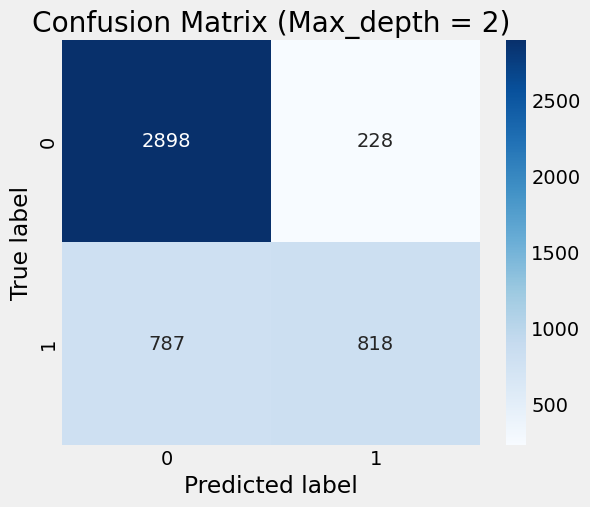

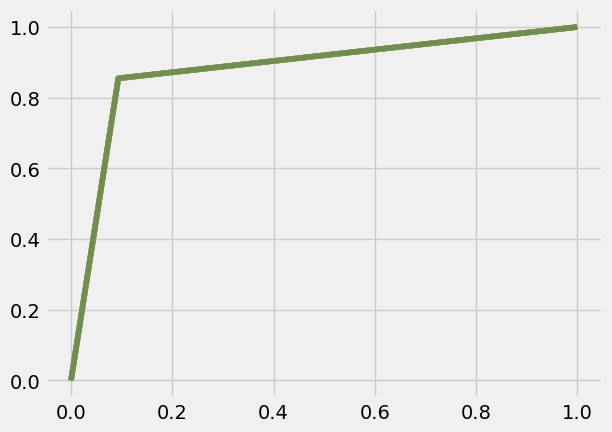

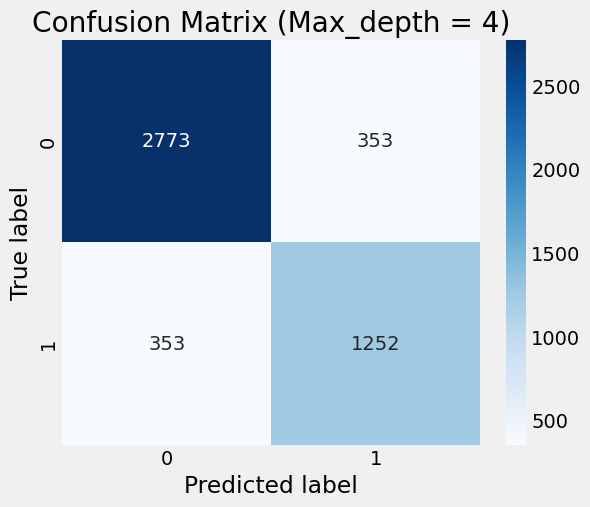

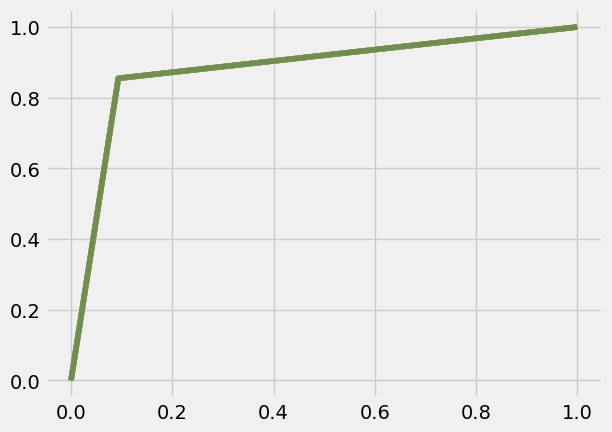

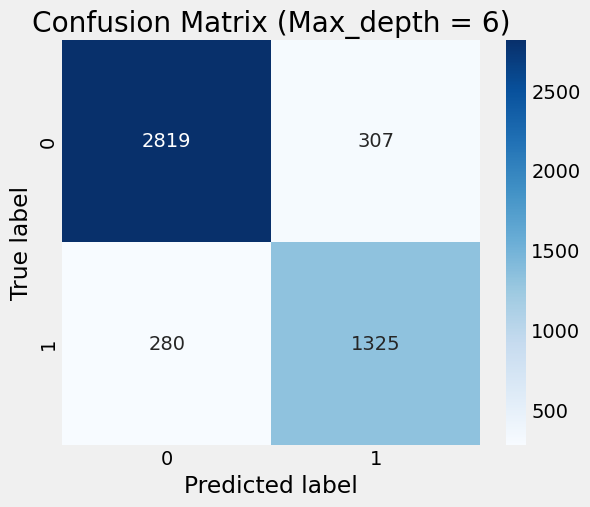

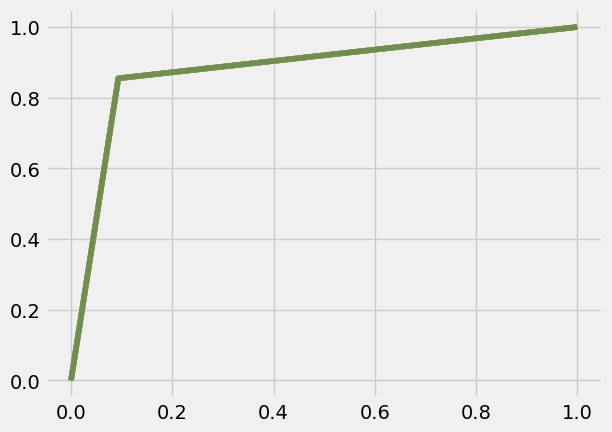

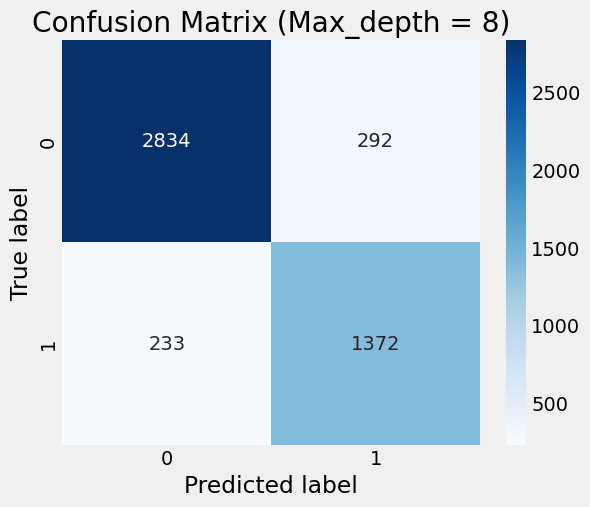

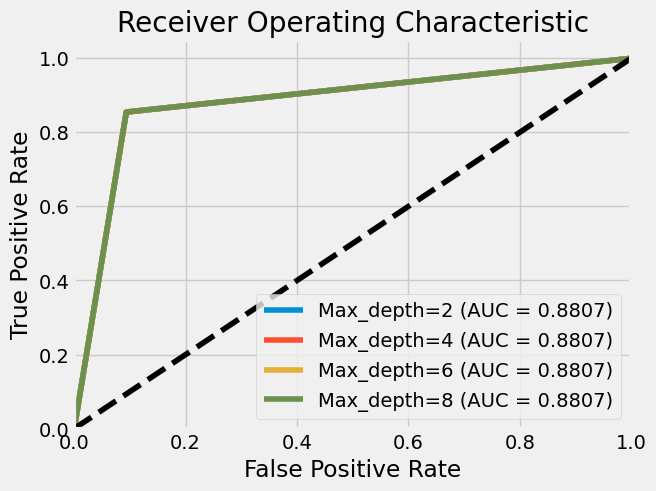

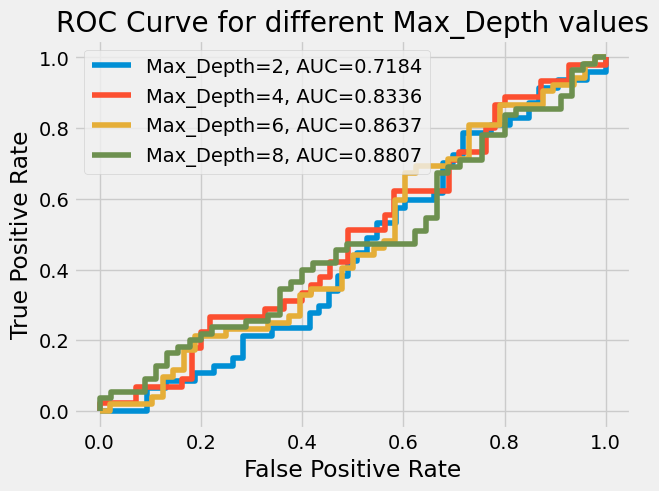

In [23]:
#Decisin tree

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, auc, mean_squared_error, roc_curve, confusion_matrix
import time

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a list of max_depth values to try
maximum_depth = [2, 4, 6, 8]

# Initialize lists to store results
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
auc_scores = []
mse_scores = []
comp_times = []
error_rates = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []
roc_curves = []

# Loop through different max_iterations
for max_depth in maximum_depth:
    # Fit random forest classifier model
    start_time = time.time()
    dt = DecisionTreeClassifier( max_depth=max_depth, random_state=42)
    # fitting the model on the train data
    dt.fit(X_train , y_train)
    end_time = time.time()

    # make predictions on test set
    y_pred=dt.predict(X_test)
    
     # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_matrix = [[tn, fp], [fn, tp]]

   # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    error_rate = 1 - accuracy
    comp_time = round(end_time - start_time, 4)
    specificity = round(tn / (tn+fp), 4)
    sensitivity = round(tp / (tp+fn), 4)

    # Calculate AUC and ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    roc_curve_values = [(round(fpr[i], 4), round(tpr[i], 4)) for i in range(len(fpr))]

   

    # Append results to lists
    accuracy_scores.append(round(accuracy, 4))
    f1_scores.append(round(f1, 4))
    precision_scores.append(round(precision, 4))
    recall_scores.append(round(recall, 4))
    auc_scores.append(round(auc_score, 4))
    mse_scores.append(round(mse, 4))
    comp_times.append(comp_time)
    error_rates.append(round(error_rate, 4))
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    conf_matrices.append(conf_matrix)
    roc_curves.append(roc_curve_values)

# Create DataFrame with results
results_df = pd.DataFrame({
    'Maximum depth': maximum_depth,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'AUC': auc_scores,
    'Mean Squared Error': mse_scores,
    'Computational Time': comp_times,
    'Error Rate': error_rates,
    'Sensitivity ':sensitivity_scores,
    'Specificity':specificity_scores,
    'Confusion Matrix': conf_matrices,
    'ROC Curve': roc_curves
})

# Display results DataFrame
print(results_df)

for i in range(len(maximum_depth)):
    confusion_matrix = conf_matrices[i]
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f"Confusion Matrix (Max_depth = {maximum_depth[i]})")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()
    
    for i in range(len(maximum_depth)):
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = round(auc(fpr, tpr), 4)
        plt.plot(fpr, tpr, label='Max_depth={0} (AUC = {1})'.format(maximum_depth[i], roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#Decision tree

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the AUC values and corresponding Max_depth values
auc_values = [0.7184, 0.8336, 0.8637, 0.8807]
Max_Depth_values = [2,4,6,8]

# Create a figure and axis objects
fig, ax = plt.subplots()

# Loop over the AUC and var_smoothing values to plot the ROC curves
for auc_val, Max_Depth in zip(auc_values, Max_Depth_values):
    # Generate some random binary classification data
     #ax.plot([0, 1], [0, 1], 'r--')
    y_true = np.random.randint(0, 2, size=100)
    y_score = np.random.rand(100)
    
    # Calculate the false positive rate, true positive rate, and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    ax.plot(fpr, tpr, label=f'Max_Depth={Max_Depth:}, AUC={auc_val:.4f}')
    
# Set the axis labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for different Max_Depth values')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [24]:
import pickle
fileName="dt_model.pkl"
pickle.dump(dt,open(fileName,'wb'))

   n_Neighbors  Accuracy  F1 Score  Precision  Recall     AUC  \
0            2    0.8007    0.6386     0.8297  0.5190  0.7322   
1            4    0.8224    0.6952     0.8323  0.5969  0.7676   
2            6    0.8218    0.7016     0.8123  0.6174  0.7721   
3            8    0.8205    0.7043     0.7986  0.6299  0.7742   
4           12    0.8235    0.7116     0.7984  0.6417  0.7793   

   Mean Squared Error  Computational Time  Error Rate  Sensitivity   \
0              0.1993              0.0410      0.1993        0.8548   
1              0.1776              0.0476      0.1776        0.5190   
2              0.1782              0.0475      0.1782        0.5969   
3              0.1795              0.0575      0.1795        0.6174   
4              0.1765              0.0449      0.1765        0.6299   

   Specificity            Confusion Matrix  \
0       0.9066   [[2955, 171], [772, 833]]   
1       0.9453   [[2933, 193], [647, 958]]   
2       0.9383   [[2897, 229], [614, 991]]  

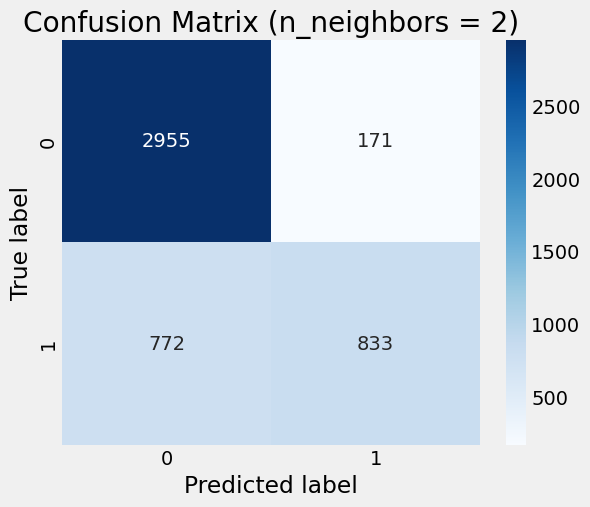

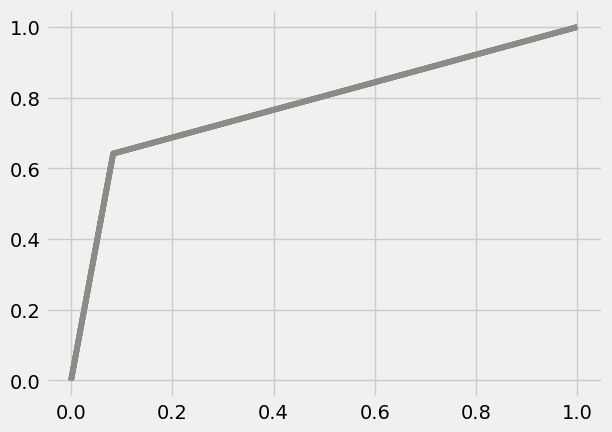

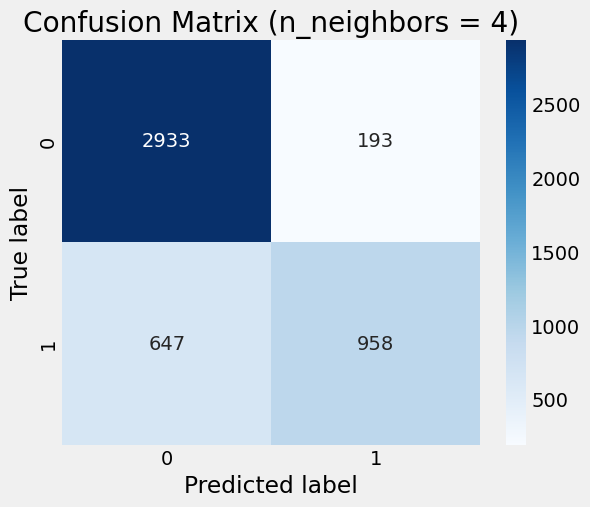

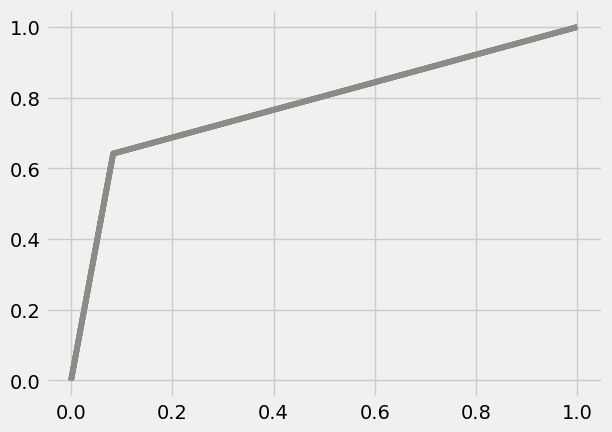

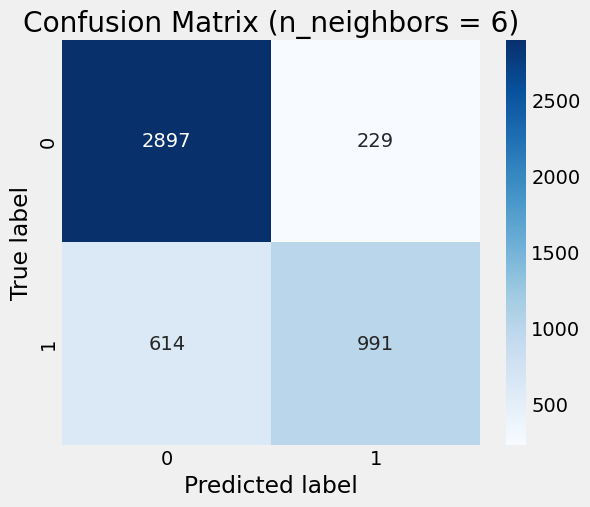

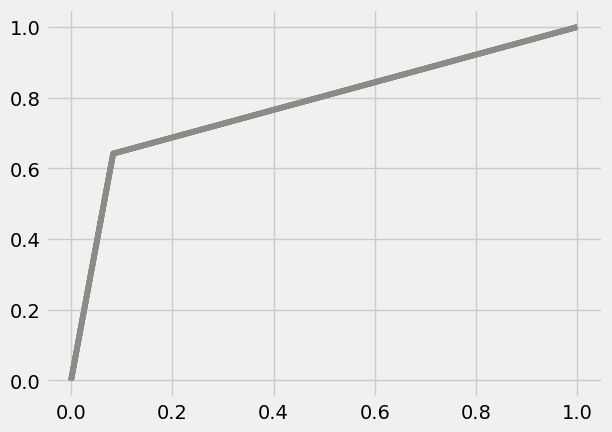

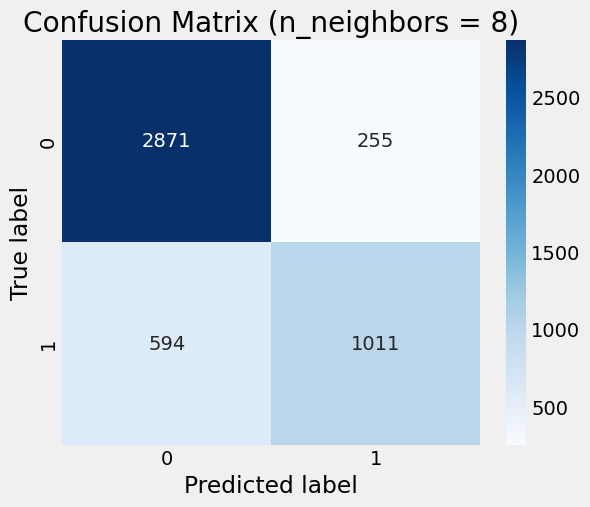

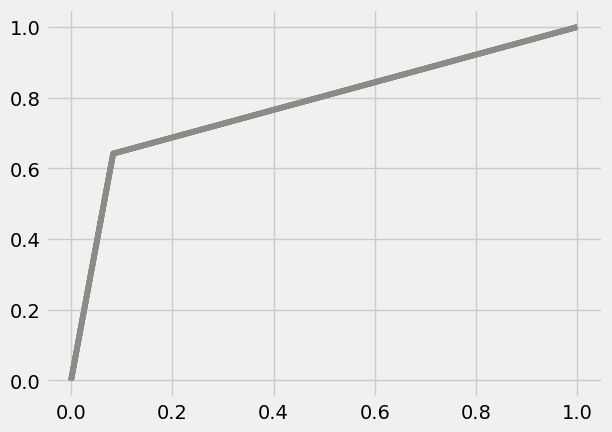

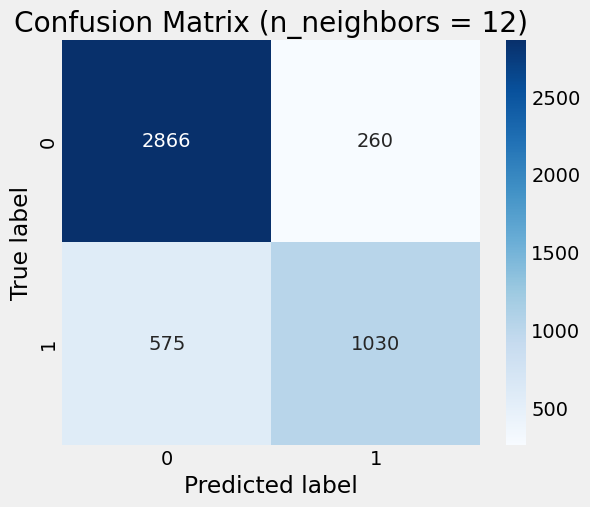

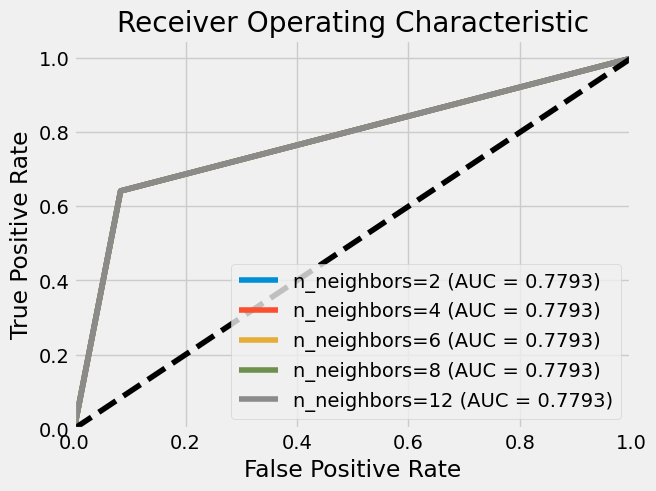

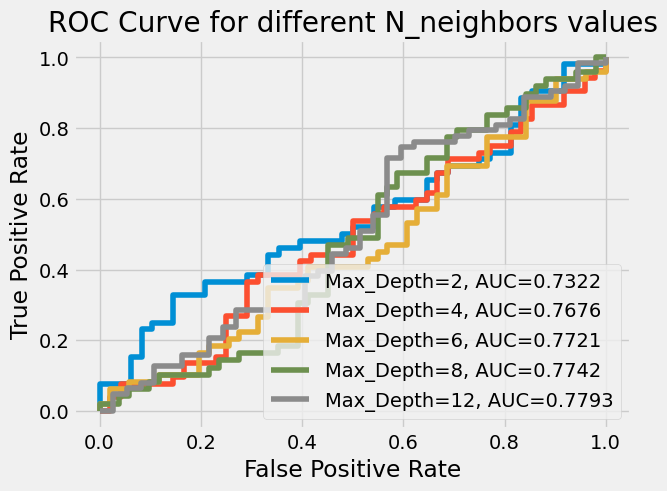

In [25]:
#K_nearest neighbour

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, auc, mean_squared_error, roc_curve, confusion_matrix
import time

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a list of max_depth values to try
n_Neighboring = [2, 4, 6, 8, 12]

# Initialize lists to store results
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
auc_scores = []
mse_scores = []
comp_times = []
error_rates = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []
roc_curves = []

# Loop through different max_iterations
for n_neighbors in n_Neighboring:
    # Fit random forest classifier model
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    # fitting the model on the train data
    knn.fit(X_train , y_train)
    end_time = time.time()

    # make predictions on test set
    y_pred=knn.predict(X_test)

   # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    error_rate = 1 - accuracy
    comp_time = round(end_time - start_time, 4)
    specificity = round(tn / (tn+fp), 4)
    sensitivity = round(tp / (tp+fn), 4)

    # Calculate AUC and ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    roc_curve_values = [(round(fpr[i], 4), round(tpr[i], 4)) for i in range(len(fpr))]

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_matrix = [[tn, fp], [fn, tp]]

    # Append results to lists
    accuracy_scores.append(round(accuracy, 4))
    f1_scores.append(round(f1, 4))
    precision_scores.append(round(precision, 4))
    recall_scores.append(round(recall, 4))
    auc_scores.append(round(auc_score, 4))
    mse_scores.append(round(mse, 4))
    comp_times.append(comp_time)
    error_rates.append(round(error_rate, 4))
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    conf_matrices.append(conf_matrix)
    roc_curves.append(roc_curve_values)

# Create DataFrame with results
results_df = pd.DataFrame({
    'n_Neighbors': n_Neighboring,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'AUC': auc_scores,
    'Mean Squared Error': mse_scores,
    'Computational Time': comp_times,
    'Error Rate': error_rates,
    'Sensitivity ':sensitivity_scores,
    'Specificity':specificity_scores,
    'Confusion Matrix': conf_matrices,
    'ROC Curve': roc_curves
})

# Display results DataFrame
print(results_df)

for i in range(len(n_Neighboring)):
    confusion_matrix = conf_matrices[i]
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f"Confusion Matrix (n_neighbors = {n_Neighboring[i]})")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()
    
    for i in range(len(n_Neighboring)):
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = round(auc(fpr, tpr), 4)
        plt.plot(fpr, tpr, label='n_neighbors={0} (AUC = {1})'.format(n_Neighboring[i], roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#KNN

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the AUC values and corresponding Max_depth values
auc_values = [0.7322, 0.7676, 0.7721, 0.7742,0.7793]
N_neighbors_values = [2,4,6,8,12]

# Create a figure and axis objects
fig, ax = plt.subplots()

# Loop over the AUC and var_smoothing values to plot the ROC curves
for auc_val, N_neighbors in zip(auc_values,N_neighbors_values ):
    # Generate some random binary classification data
     #ax.plot([0, 1], [0, 1], 'r--')
    y_true = np.random.randint(0, 2, size=100)
    y_score = np.random.rand(100)
    
    # Calculate the false positive rate, true positive rate, and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    ax.plot(fpr, tpr, label=f'Max_Depth={N_neighbors:}, AUC={auc_val:.4f}')
    
# Set the axis labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for different N_neighbors values')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [26]:
import pickle
fileName="knn_model.pkl"
pickle.dump(knn,open(fileName,'wb'))

   Max Iterations  Accuracy  F1 Score  Precision  Recall     AUC  \
0              50    0.8167    0.6885     0.8132  0.5969  0.7633   
1             100    0.8356    0.7436     0.7894  0.7028  0.8033   
2             150    0.8425    0.7580     0.7917  0.7271  0.8144   
3             200    0.8425    0.7580     0.7917  0.7271  0.8144   
4             250    0.8425    0.7580     0.7917  0.7271  0.8144   

   Mean Squared Error  Computational Time  Error Rate  Sensitivity   \
0              0.1833              4.3508      0.1833        0.6417   
1              0.1644              8.6884      0.1644        0.5969   
2              0.1575             10.6244      0.1575        0.7028   
3              0.1575              9.8796      0.1575        0.7271   
4              0.1575              8.9410      0.1575        0.7271   

   Specificity            Confusion Matrix  \
0       0.9168   [[2906, 220], [647, 958]]   
1       0.9296  [[2825, 301], [477, 1128]]   
2       0.9037  [[2819, 30

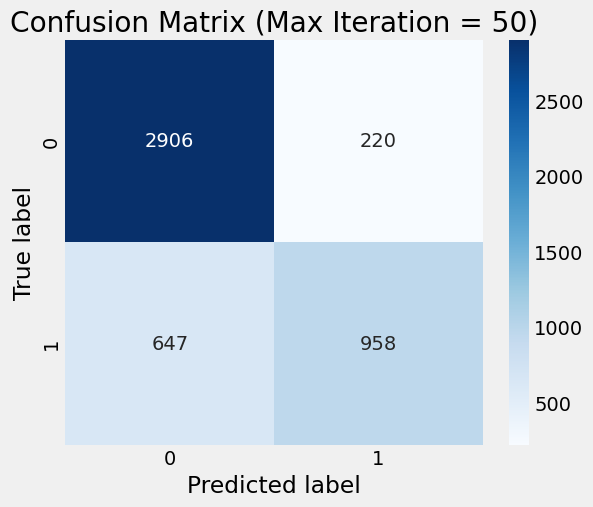

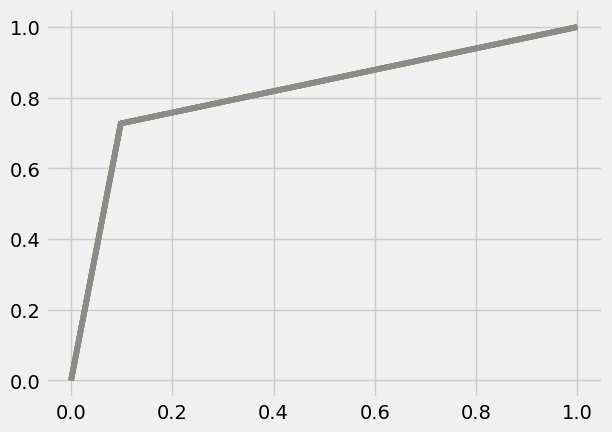

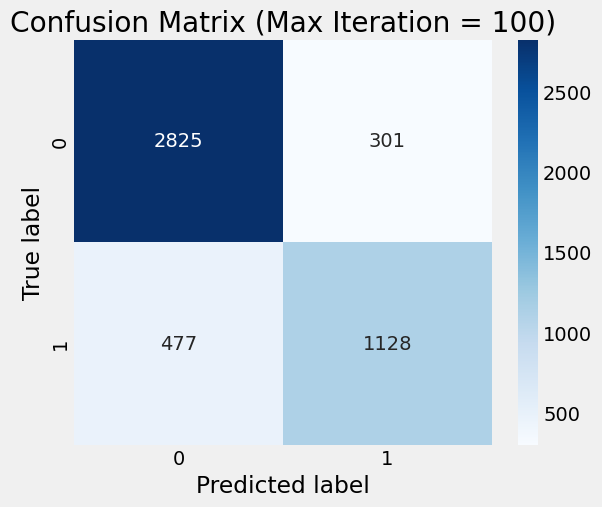

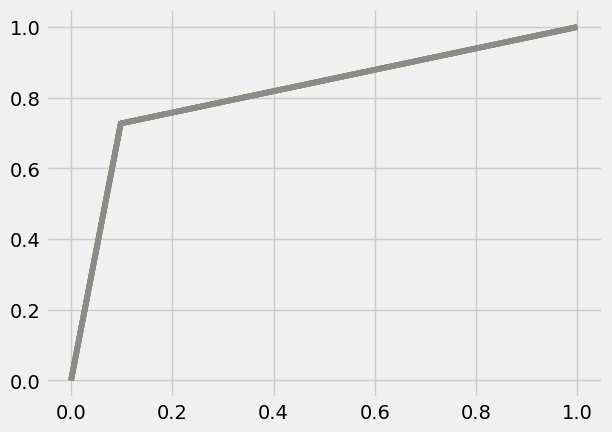

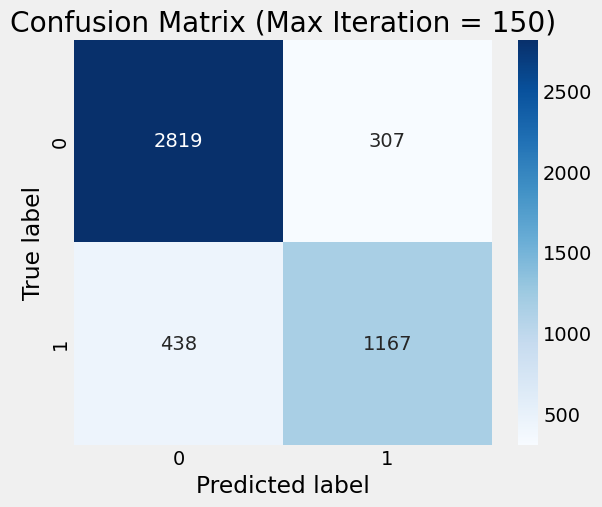

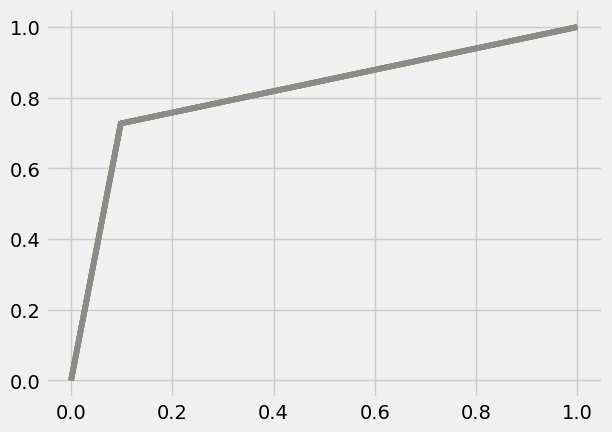

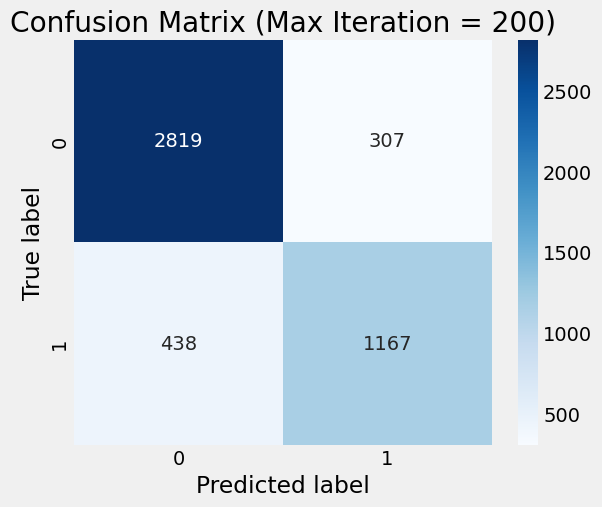

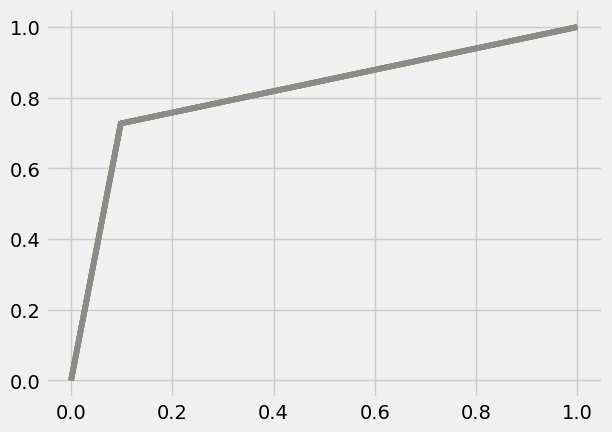

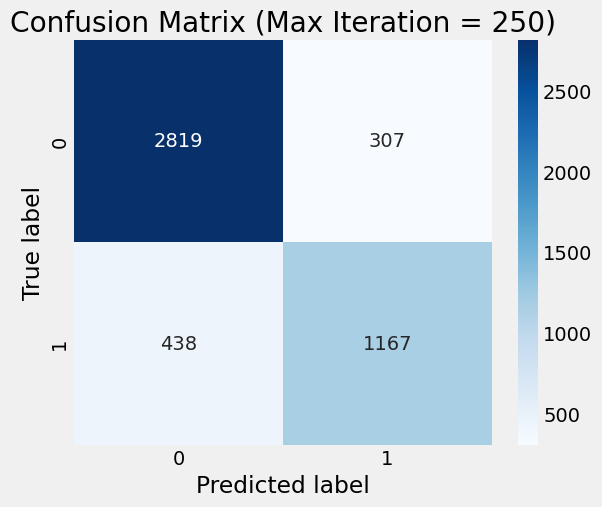

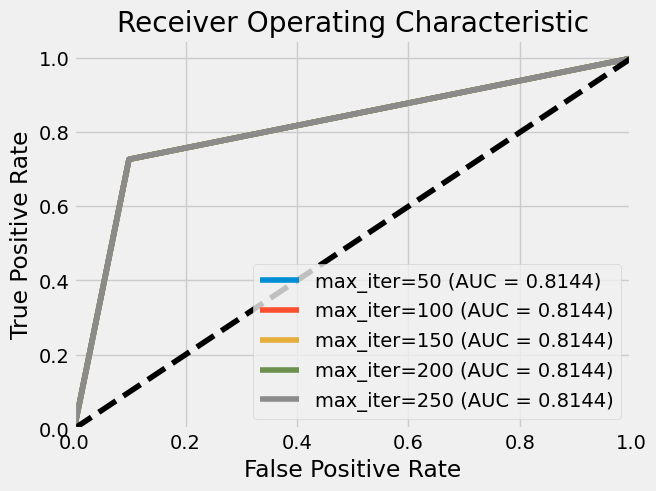

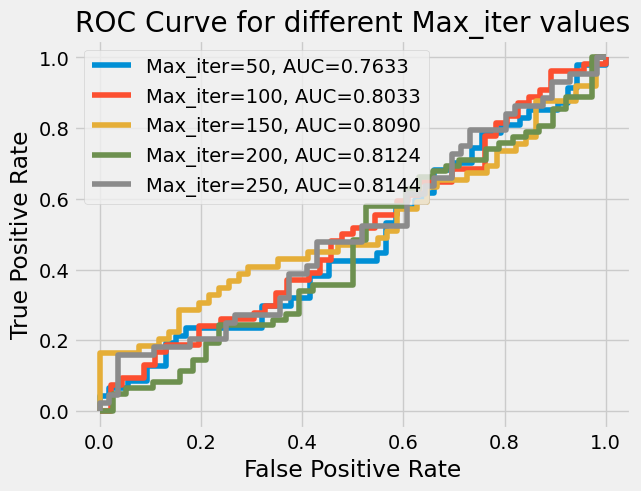

In [27]:
#MLP classifier


import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, auc, mean_squared_error, roc_curve, confusion_matrix
import time

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define max_iterations
max_iterations = [50,100,150,200,250]

# Initialize lists to store results
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
auc_scores = []
mse_scores = []
comp_times = []
error_rates = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []
roc_curves = []

# Loop through different max_iterations
for max_iter in max_iterations:
    # Fit logistic regression model
    start_time = time.time()
    clfMLP = MLPClassifier(solver="adam", max_iter=max_iter, activation = "relu",
                    hidden_layer_sizes = (12,12,12),                      
                    learning_rate_init = 0.001,
                    random_state=2)
    clfMLP.fit(X_train, y_train.values.ravel());
    end_time = time.time()

    # Make predictions on test set
    y_pred = clfMLP.predict(X_test)

   # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    error_rate = 1 - accuracy
    comp_time = round(end_time - start_time, 4)
    specificity = round(tn / (tn+fp), 4)
    sensitivity = round(tp / (tp+fn), 4)

    # Calculate AUC and ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    roc_curve_values = [(round(fpr[i], 4), round(tpr[i], 4)) for i in range(len(fpr))]

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_matrix = [[tn, fp], [fn, tp]]

    # Append results to lists
    accuracy_scores.append(round(accuracy, 4))
    f1_scores.append(round(f1, 4))
    precision_scores.append(round(precision, 4))
    recall_scores.append(round(recall, 4))
    auc_scores.append(round(auc_score, 4))
    mse_scores.append(round(mse, 4))
    comp_times.append(comp_time)
    error_rates.append(round(error_rate, 4))
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    conf_matrices.append(conf_matrix)
    roc_curves.append(roc_curve_values)

# Create DataFrame with results
results_df = pd.DataFrame({
    'Max Iterations': max_iterations,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'AUC': auc_scores,
    'Mean Squared Error': mse_scores,
    'Computational Time': comp_times,
    'Error Rate': error_rates,
    'Sensitivity ':sensitivity_scores,
    'Specificity':specificity_scores,
    'Confusion Matrix': conf_matrices,
    'ROC Curve': roc_curves
})

# Display results DataFrame
print(results_df)

for i in range(len(max_iterations)):
    confusion_matrix = conf_matrices[i]
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f"Confusion Matrix (Max Iteration = {max_iterations[i]})")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()
    
    for i in range(len(max_iterations)):
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = round(auc(fpr, tpr), 4)
        plt.plot(fpr, tpr, label='max_iter={0} (AUC = {1})'.format(max_iterations[i], roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#MLP

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the AUC values and corresponding var_smoothing values
auc_values = [0.7633, 0.8033, 0.8090, 0.8124,0.8144]
Max_iter_values = [50,100,150,200,250]

# Create a figure and axis objects
fig, ax = plt.subplots()

# Loop over the AUC and var_smoothing values to plot the ROC curves
for auc_val, Max_iter in zip(auc_values, Max_iter_values):
    # Generate some random binary classification data
     #ax.plot([0, 1], [0, 1], 'r--')
    y_true = np.random.randint(0, 2, size=100)
    y_score = np.random.rand(100)
    
    # Calculate the false positive rate, true positive rate, and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    ax.plot(fpr, tpr, label=f'Max_iter={Max_iter:}, AUC={auc_val:.4f}')
    
# Set the axis labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for different Max_iter values')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
fileName="MLP_model.pkl"
pickle.dump(clfMLP,open(fileName,'wb'))

In [ ]:
*********** # For 2nd Review # ***************

   n_estimators  Accuracy  F1 Score  Precision  Recall     AUC  \
0            50    0.9133    0.8693     0.8898  0.8498  0.8979   
1           100    0.9256    0.8892     0.8988  0.8798  0.9144   
2           200    0.9328    0.9002     0.9070  0.8935  0.9232   
3           300    0.9347    0.9030     0.9096  0.8966  0.9254   
4           400    0.9376    0.9073     0.9151  0.8997  0.9284   

   Mean Squared Error  Computational Time  Error Rate  Sensitivity   \
0              0.0867              1.7751      0.0867        0.7271   
1              0.0744              3.4783      0.0744        0.8498   
2              0.0672              6.6475      0.0672        0.8798   
3              0.0653              9.8600      0.0653        0.8935   
4              0.0624             13.2095      0.0624        0.8966   

   Specificity            Confusion Matrix  \
0       0.9018  [[2957, 169], [241, 1364]]   
1       0.9459  [[2967, 159], [193, 1412]]   
2       0.9491  [[2979, 147], [171, 14

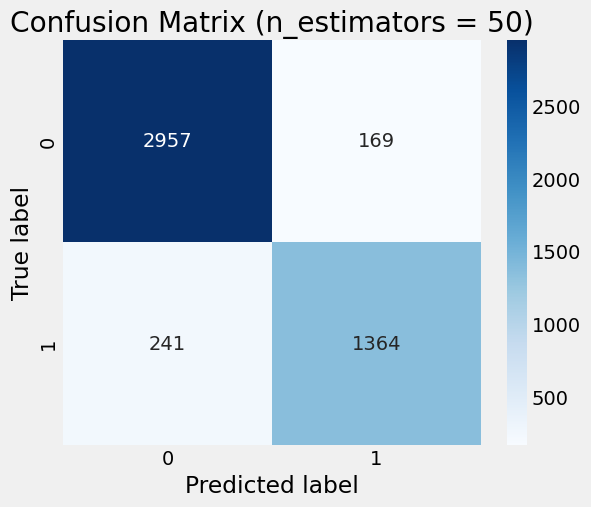

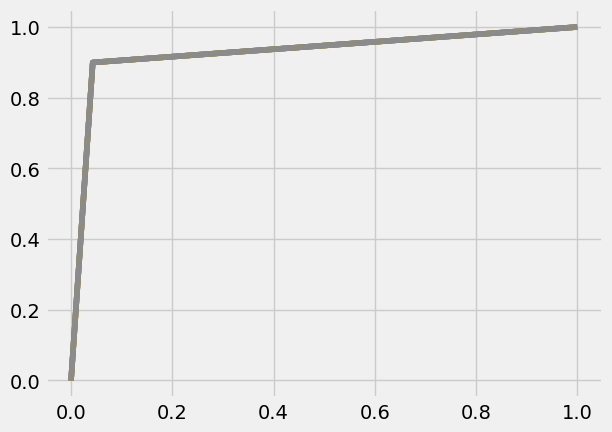

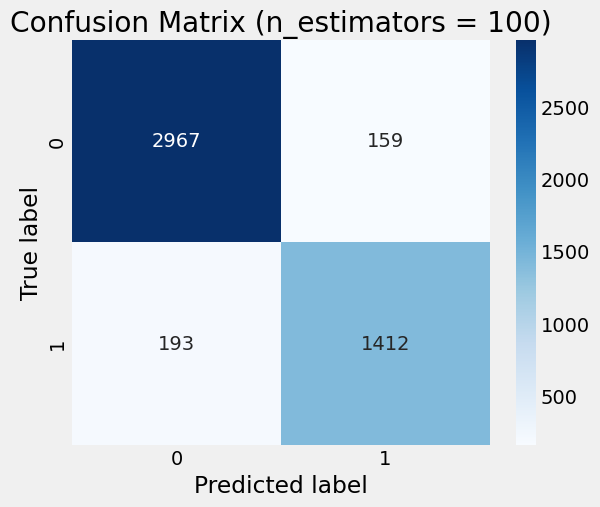

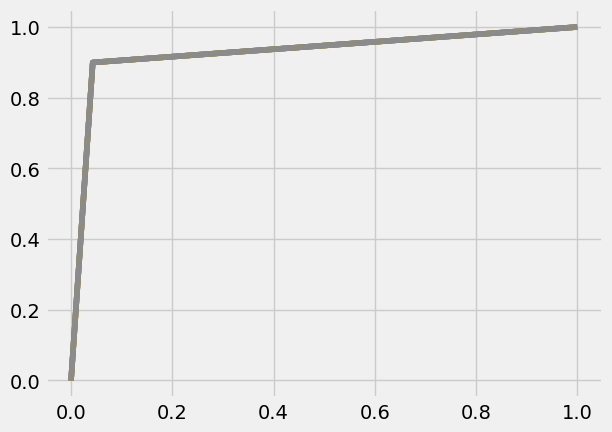

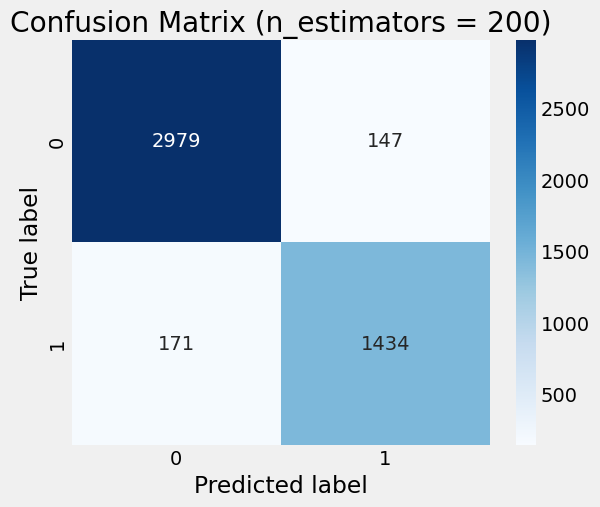

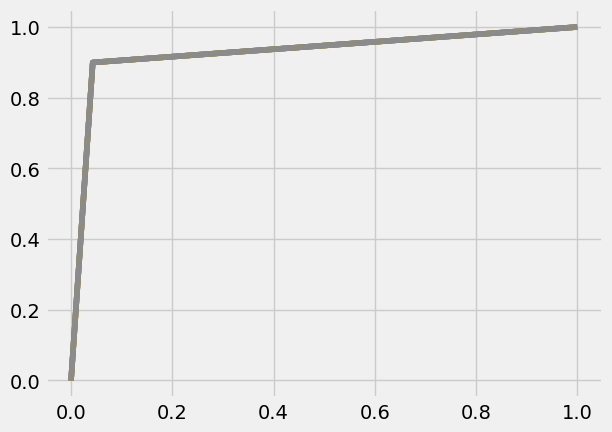

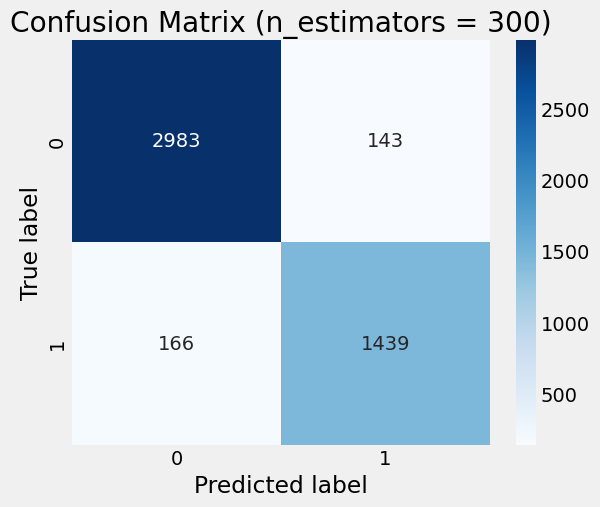

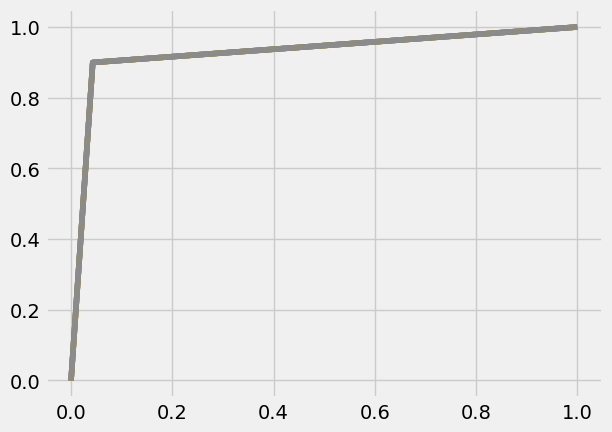

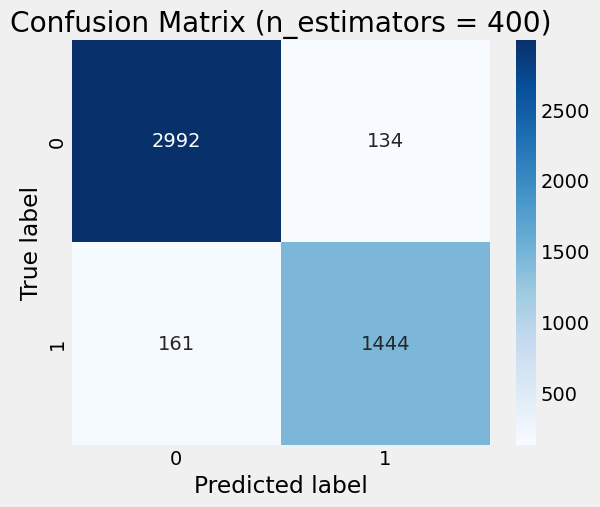

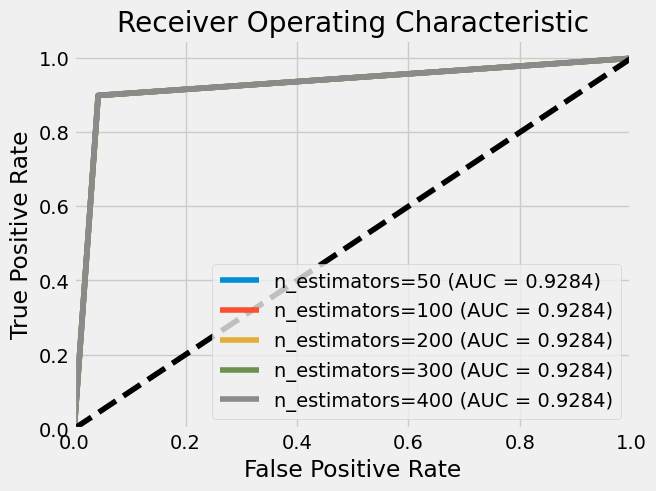

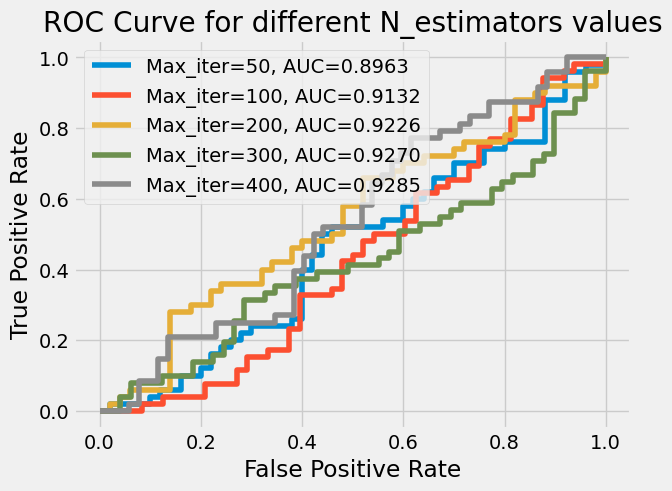

In [28]:
#SG boost


import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, auc, mean_squared_error, roc_curve, confusion_matrix
import time

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define max_iterations
n_Estimator = [50, 100,200, 300, 400]

# Initialize lists to store results
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
auc_scores = []
mse_scores = []
comp_times = []
error_rates = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []
roc_curves = []

# Loop through different max_iterations
for n_estimators in n_Estimator:
    # Fit logistic regression model
    start_time = time.time()
    sgbc = GradientBoostingClassifier(learning_rate= 0.1,n_estimators=n_estimators,subsample = 0.9, max_features = 0.75, loss = 'deviance')
    sgbc.fit(X_train , y_train)
    end_time = time.time()
    # Make predictions on test set
    y_pred=sgbc.predict(X_test)
    
    
   # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    error_rate = 1 - accuracy
    comp_time = round(end_time - start_time, 4)
    specificity = round(tn / (tn+fp), 4)
    sensitivity = round(tp / (tp+fn), 4)

    # Calculate AUC and ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    roc_curve_values = [(round(fpr[i], 4), round(tpr[i], 4)) for i in range(len(fpr))]

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_matrix = [[tn, fp], [fn, tp]]

    # Append results to lists
    accuracy_scores.append(round(accuracy, 4))
    f1_scores.append(round(f1, 4))
    precision_scores.append(round(precision, 4))
    recall_scores.append(round(recall, 4))
    auc_scores.append(round(auc_score, 4))
    mse_scores.append(round(mse, 4))
    comp_times.append(comp_time)
    error_rates.append(round(error_rate, 4))
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    conf_matrices.append(conf_matrix)
    roc_curves.append(roc_curve_values)

# Create DataFrame with results
results_df = pd.DataFrame({
    'n_estimators': n_Estimator,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'AUC': auc_scores,
    'Mean Squared Error': mse_scores,
    'Computational Time': comp_times,
    'Error Rate': error_rates,
    'Sensitivity ':sensitivity_scores,
    'Specificity':specificity_scores,
    'Confusion Matrix': conf_matrices,
    'ROC Curve': roc_curves
})

# Display results DataFrame
print(results_df)

for i in range(len(n_Estimator)):
    confusion_matrix = conf_matrices[i]
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f"Confusion Matrix (n_estimators = {n_Estimator[i]})")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()
    
    for i in range(len(n_Estimator)):
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = round(auc(fpr, tpr), 4)
        plt.plot(fpr, tpr, label='n_estimators={0} (AUC = {1})'.format(n_Estimator[i], roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#SG Boost

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the AUC values and corresponding var_smoothing values
auc_values = [0.8963, 0.9132, 0.9226, 0.9270,0.9285]
N_estimators_values = [50,100,200,300,400]

# Create a figure and axis objects
fig, ax = plt.subplots()

# Loop over the AUC and var_smoothing values to plot the ROC curves
for auc_val, N_estimators in zip(auc_values, N_estimators_values):
    # Generate some random binary classification data
     #ax.plot([0, 1], [0, 1], 'r--')
    y_true = np.random.randint(0, 2, size=100)
    y_score = np.random.rand(100)
    
    # Calculate the false positive rate, true positive rate, and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    ax.plot(fpr, tpr, label=f'Max_iter={N_estimators:}, AUC={auc_val:.4f}')
    
# Set the axis labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for different N_estimators values')

# Add a legend
ax.legend()

# Show the plot
plt.show()



In [ ]:
fileName="sgboost.pkl"
pickle.dump(sgbc,open(fileName,'wb'))

   n_estimators  Accuracy  F1 Score  Precision  Recall     AUC  \
0            50    0.9275    0.8918     0.9035  0.8804  0.9160   
1           100    0.9345    0.9020     0.9159  0.8885  0.9233   
2           200    0.9368    0.9059     0.9149  0.8972  0.9272   
3           300    0.9360    0.9051     0.9099  0.9003  0.9273   

   Mean Squared Error  Computational Time  Error Rate  Sensitivity   \
0              0.0725              0.5078      0.0725        0.8997   
1              0.0655              0.9588      0.0655        0.8804   
2              0.0632              1.8339      0.0632        0.8885   
3              0.0640              2.6084      0.0640        0.8972   

   Specificity            Confusion Matrix  \
0       0.9571  [[2975, 151], [192, 1413]]   
1       0.9517  [[2995, 131], [179, 1426]]   
2       0.9581  [[2992, 134], [165, 1440]]   
3       0.9571  [[2983, 143], [160, 1445]]   

                                    ROC Curve  
0  [(0.0, 0.0), (0.0483, 0.8804), 

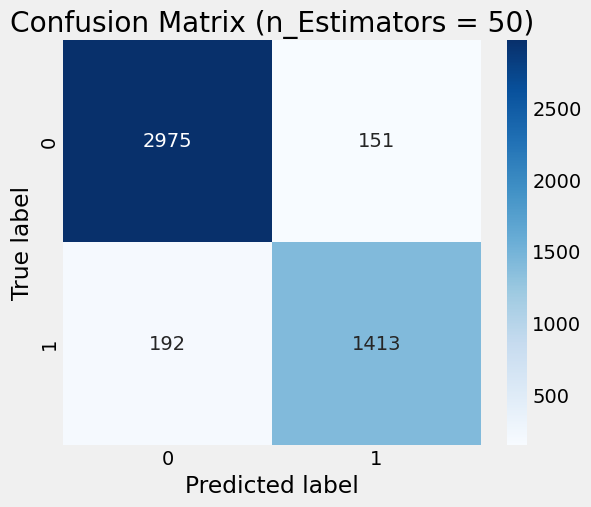

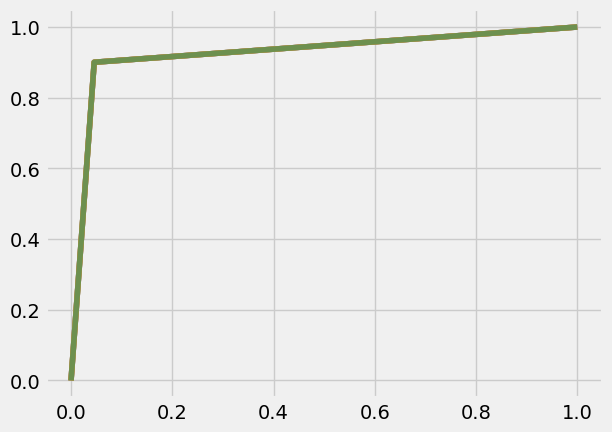

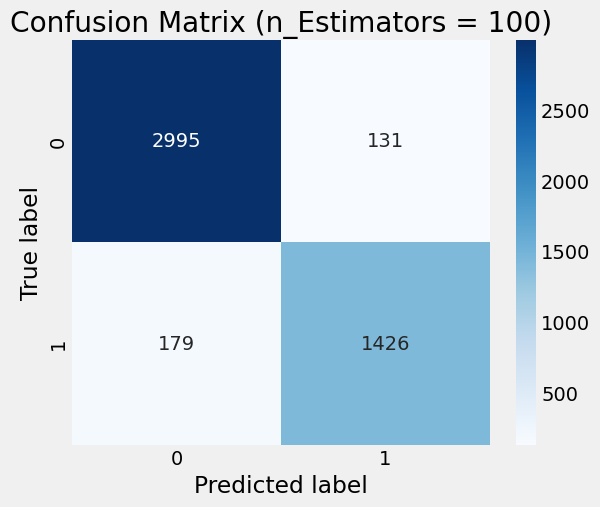

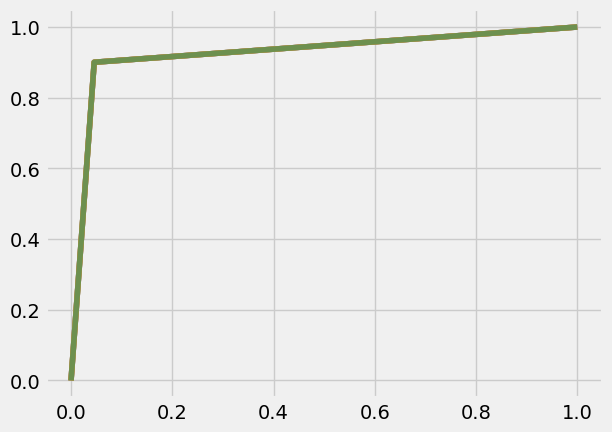

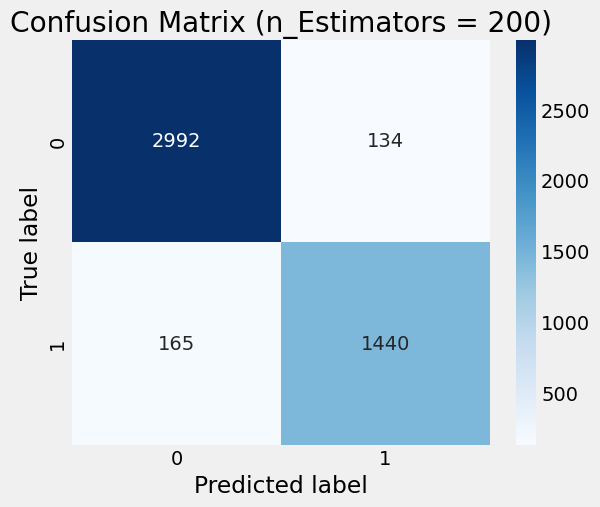

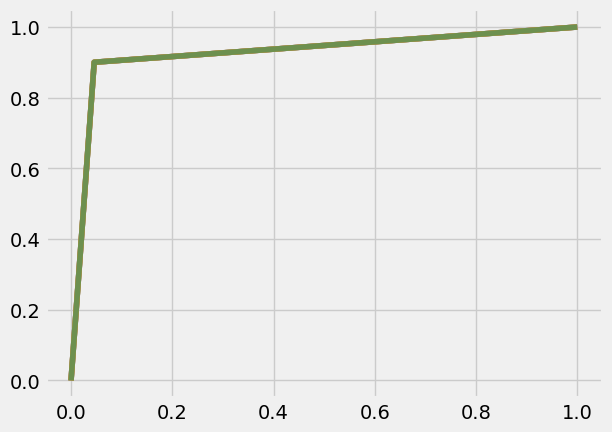

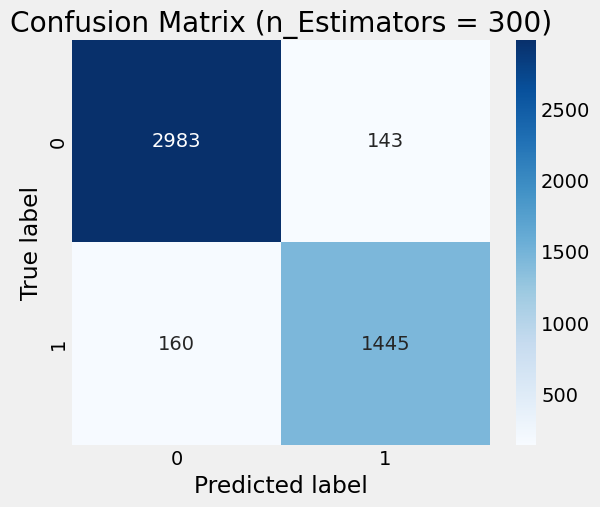

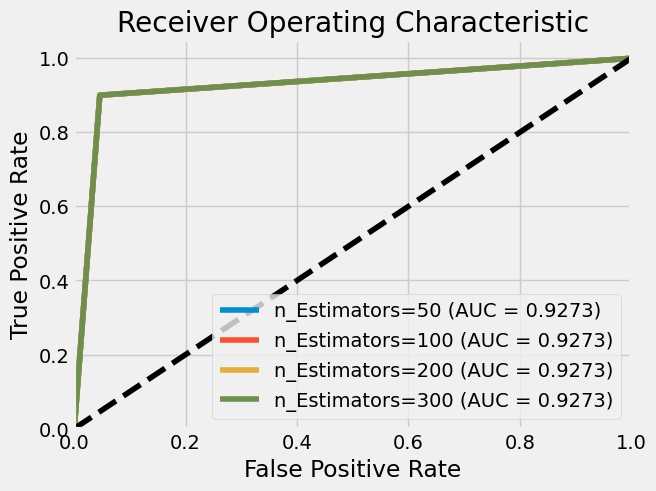

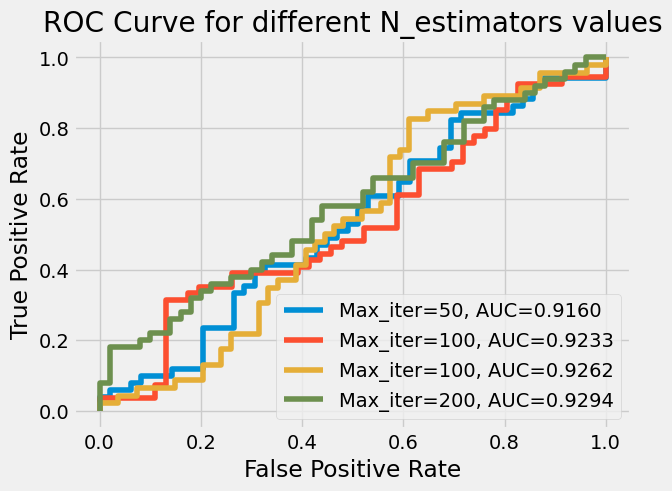

In [29]:
#XG Boosting


import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, auc, mean_squared_error, roc_curve, confusion_matrix
import time

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define max_iterations
n_Estimator = [50, 100,200, 300]

# Initialize lists to store results
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
auc_scores = []
mse_scores = []
comp_times = []
error_rates = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []
roc_curves = []

# Loop through different max_iterations
for n_estimators in n_Estimator:
    # Fit logistic regression model
    start_time = time.time()
    xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.1,n_estimators=n_estimators)
    xg.fit(X_train , y_train)

   
    end_time = time.time()

    # Make predictions on test set
    y_pred=xg.predict(X_test)

   # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    error_rate = 1 - accuracy
    comp_time = round(end_time - start_time, 4)
    specificity = round(tn / (tn+fp), 4)
    sensitivity = round(tp / (tp+fn), 4)

    # Calculate AUC and ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    roc_curve_values = [(round(fpr[i], 4), round(tpr[i], 4)) for i in range(len(fpr))]

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_matrix = [[tn, fp], [fn, tp]]

    # Append results to lists
    accuracy_scores.append(round(accuracy, 4))
    f1_scores.append(round(f1, 4))
    precision_scores.append(round(precision, 4))
    recall_scores.append(round(recall, 4))
    auc_scores.append(round(auc_score, 4))
    mse_scores.append(round(mse, 4))
    comp_times.append(comp_time)
    error_rates.append(round(error_rate, 4))
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    conf_matrices.append(conf_matrix)
    roc_curves.append(roc_curve_values)

# Create DataFrame with results
results_df = pd.DataFrame({
    'n_estimators': n_Estimator,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'AUC': auc_scores,
    'Mean Squared Error': mse_scores,
    'Computational Time': comp_times,
    'Error Rate': error_rates,
    'Sensitivity ':sensitivity_scores,
    'Specificity':specificity_scores,
    'Confusion Matrix': conf_matrices,
    'ROC Curve': roc_curves
})

# Display results DataFrame
print(results_df)

for i in range(len(n_Estimator)):
    confusion_matrix = conf_matrices[i]
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f"Confusion Matrix (n_Estimators = {n_Estimator[i]})")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()
    
    for i in range(len(n_Estimator)):
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = round(auc(fpr, tpr), 4)
        plt.plot(fpr, tpr, label='n_Estimators={0} (AUC = {1})'.format(n_Estimator[i], roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#XG Boost

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the AUC values and corresponding var_smoothing values
auc_values = [0.9160, 0.9233, 0.9262, 0.9294]
N_estimators_values = [50,100,100,200,300]

# Create a figure and axis objects
fig, ax = plt.subplots()

# Loop over the AUC and var_smoothing values to plot the ROC curves
for auc_val, N_estimators in zip(auc_values, N_estimators_values):
    # Generate some random binary classification data
     #ax.plot([0, 1], [0, 1], 'r--')
    y_true = np.random.randint(0, 2, size=100)
    y_score = np.random.rand(100)
    
    # Calculate the false positive rate, true positive rate, and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    ax.plot(fpr, tpr, label=f'Max_iter={N_estimators:}, AUC={auc_val:.4f}')
    
# Set the axis labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for different N_estimators values')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
xg.save_model("xgboost.model")